# EDA - Exploratory Data Analysis.
 - Como transformar dados em informação útil e com significado para o negócio
    - entendendo as variáveis
    - limpando o conjunto de dados
    - analisando as relações entre dados

In [2]:
#Importando as bibliotecas para fazer o EDA
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Verificando a estrutura dos dados
train_DF = pd.read_csv(r"C:\Users\Fernando Costa\Desktop\Arquivos Lucas\DS\Projetos GITHUB\Titanic\Base_dados\train.csv") 
train_DF.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Executando uma limpeza básica dos dados, excluindo as colunas que não auxiliam na predição:
train_DF = train_DF.drop(columns=["PassengerId", "Name", "Ticket"])

### • Verificando a presença de dados nulos/faltantes na base de dados, além da verificação dos Dtypes, observando se os dados foram corretamente interpretatos pelo pandas.

In [4]:
display(train_DF.info())
display(train_DF.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


None

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [5]:
print(f"Existem {177/891*100:.2f}% de dados faltantes na coluna de idade e {687/891*100:.2f}% na coluna de Cabine.")
print(f"A coluna Pclass está mal compreendida, pois apesar de um número, 3 não é necessariamente melhor do que 2. As outras colunas apresentam dados coerentes.")

Existem 19.87% de dados faltantes na coluna de idade e 77.10% na coluna de Cabine.
A coluna Pclass está mal compreendida, pois apesar de um número, 3 não é necessariamente melhor do que 2. As outras colunas apresentam dados coerentes.


## • Verificando as médias, dispersões, quartis e possíveis outliers da base de dados, a fim de observar melhor os parâmetros numéricos e guiar as próximas etapas como o próprio pré processamento:


In [6]:
train_DF.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


A coluna "Parch" e "Fare" são possíveis candidatos à presença de outliers, necessário observar a distribuição desses dados posteriormente.

### • Analisando a distribuição da idade dos passageiros em relação a classe de suas passagens:

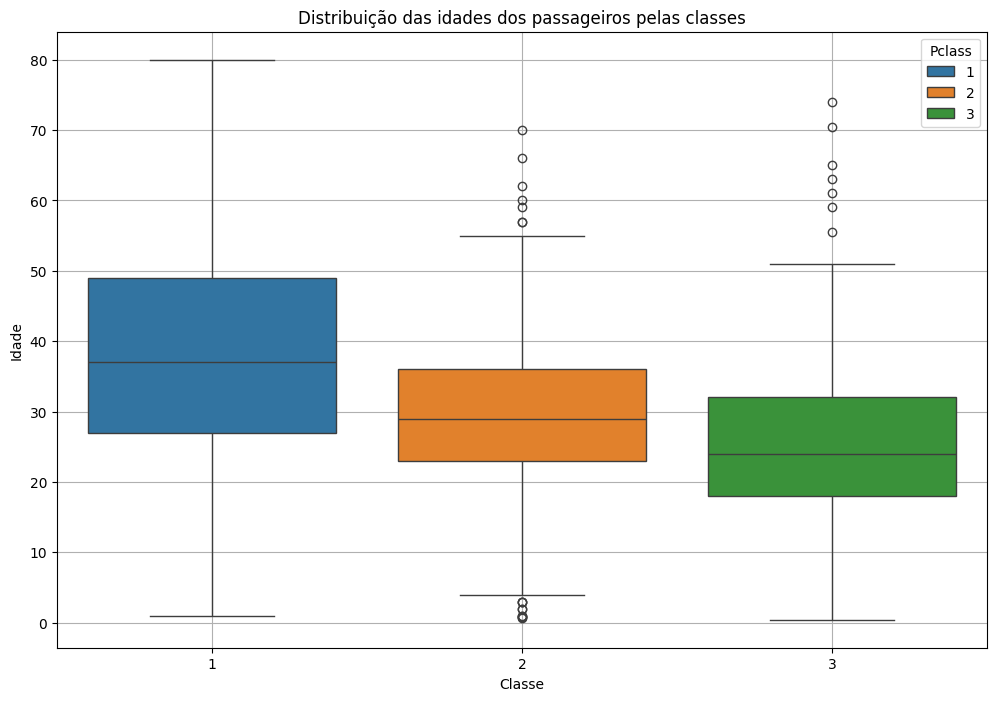

In [7]:
# Analisando as médias de idade de cada classe social
plt.figure(figsize=(12,8))

age_DF = train_DF.sort_values(by='Pclass')
sns.boxplot(data= age_DF, x = "Pclass", y = "Age", hue="Pclass",palette= "tab10")
plt.grid(True)
plt.title('Distribuição das idades dos passageiros pelas classes')
plt.xlabel('Classe')
plt.ylabel('Idade')
plt.show()

Verifica-se que a média de idade por classe social segue um certo padrão, pessoas da primeira classe são mais velhas do que comparadas às da segunda classe, que por sua vez são mais velhas que as pessoas da terceira classe.

• Verificando a Distribuição da idade dos passageiros de outra maneira:

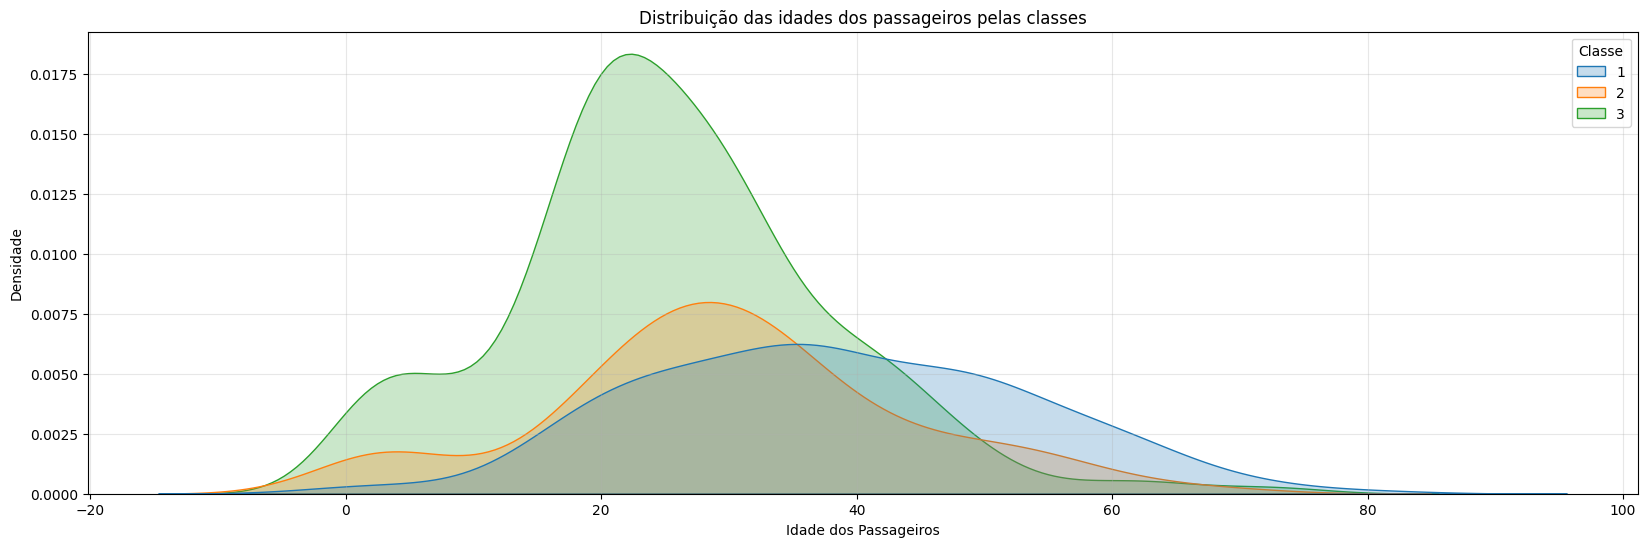

In [39]:
plt.figure(figsize=(20, 6))

ax = sns.kdeplot(data=train_DF, x="Age", hue="Pclass", palette="tab10", fill=True)

# Pegar a legenda atual e modificar apenas o título
leg = ax.get_legend()
leg.set_title("Classe")

# Configurando a transparência do grid
plt.grid(True, alpha=0.3)

plt.title('Distribuição das idades dos passageiros pelas classes')
plt.xlabel('Idade dos Passageiros') 
plt.ylabel('Densidade') 
plt.show()

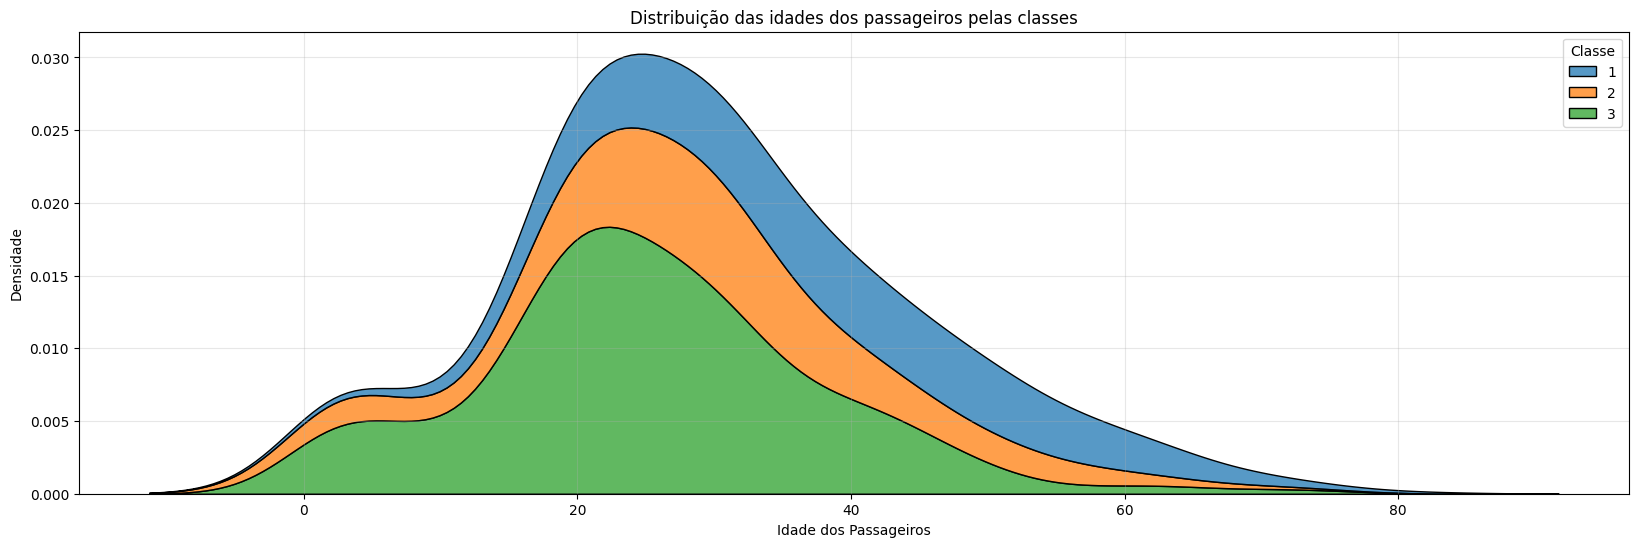

In [38]:
plt.figure(figsize=(20, 6))

ax = sns.kdeplot(data=train_DF, x="Age", hue="Pclass", multiple="stack" ,palette="tab10", fill=True)

# Pegar a legenda atual e modificar apenas o título
leg = ax.get_legend()
leg.set_title("Classe")

# Configurando a transparência do grid
plt.grid(True, alpha=0.3)

plt.title('Distribuição das idades dos passageiros pelas classes')
plt.xlabel('Idade dos Passageiros') 
plt.ylabel('Densidade') 
plt.show()

### • Verificando a presença de outliers em relação à Idade dos passageiros:

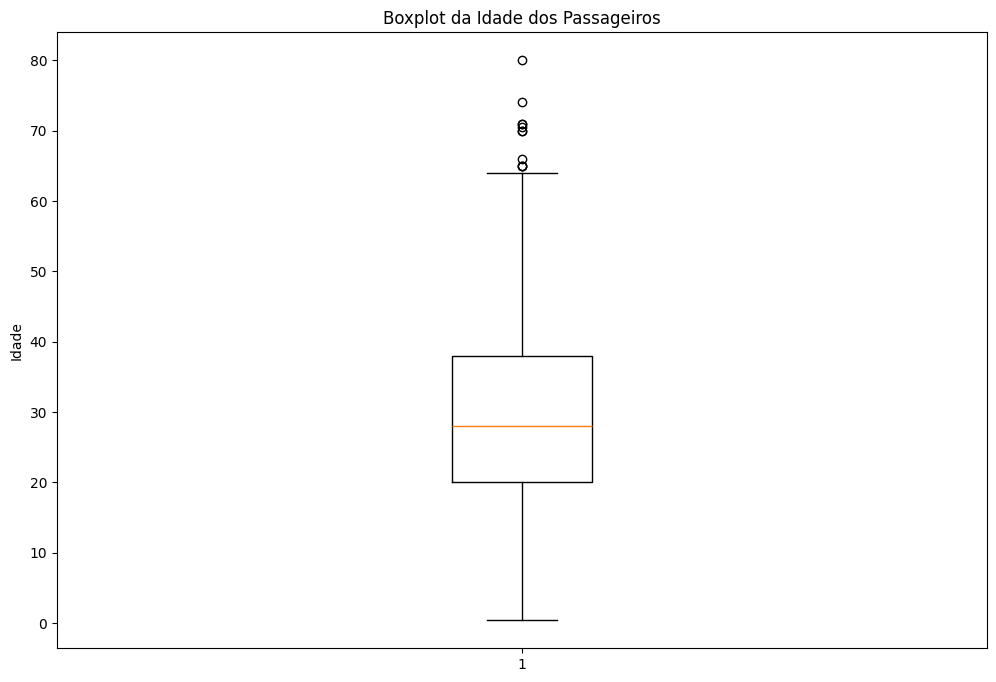

In [9]:
# Como foi identificado que a coluna de idade continha valores nulos, com o objetivo de observar a distribuição de idade dos passageiros, iremos ignorar esses valores.
age_DF = train_DF.copy()

# Criando gráfico BoxPlot para "verificar" a presença de outliers:
plt.figure(figsize=(12, 8))
plt.boxplot(age_DF["Age"].dropna())
plt.title('Boxplot da Idade dos Passageiros')
plt.ylabel('Idade')
plt.show()

É possível observar que a maioria dos passageiros tem entre 7 e 35 anos e que não há outliers.

• Agora, observando a distribuição de idade de todos os passageiros e dos que sobreviveram:

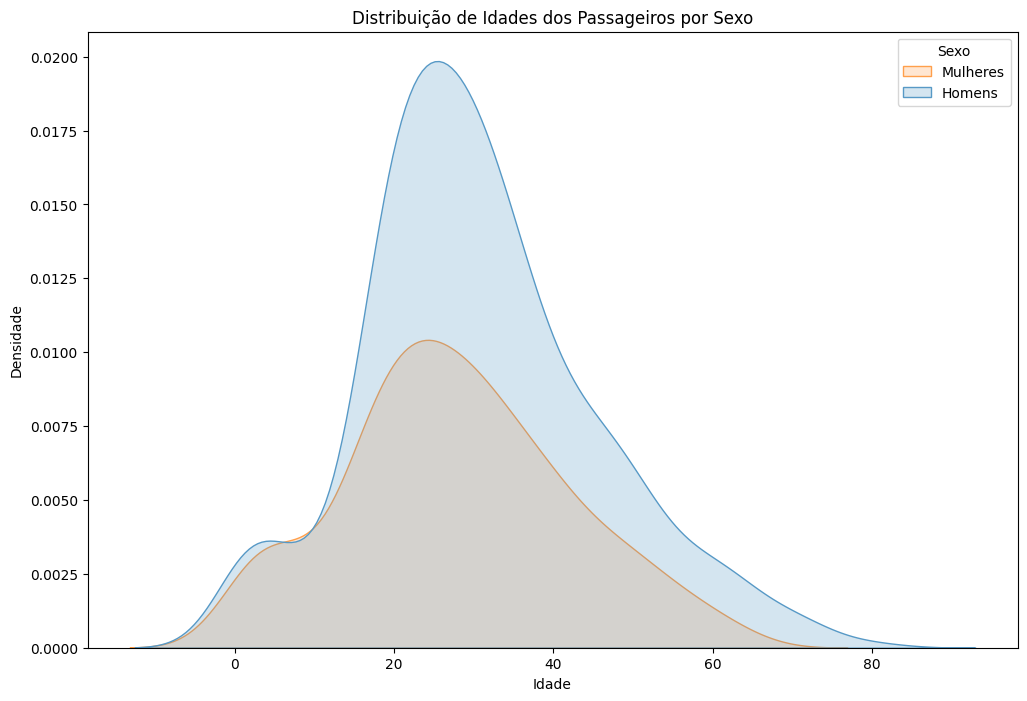

In [41]:
# Criando uma paleta de cores para os gráficos.
custom_palette = {"male": "#5799C6", "female": "#FF9F4B"}

# Criando o gráfico kdeplot
plt.figure(figsize=(12,8))
graph = sns.kdeplot(data=train_DF, x="Age", hue="Sex", fill = True,palette= custom_palette)

# Configurações do gráfico
plt.title('Distribuição de Idades dos Passageiros por Sexo')
plt.xlabel('Idade')
plt.ylabel('Densidade')
#plt.legend()
#plt.legend(title='Sexo', loc='upper right')
graph.legend(title='Sexo', labels=['Mulheres', 'Homens'], loc='upper right')
# Exibir o gráfico
plt.show()

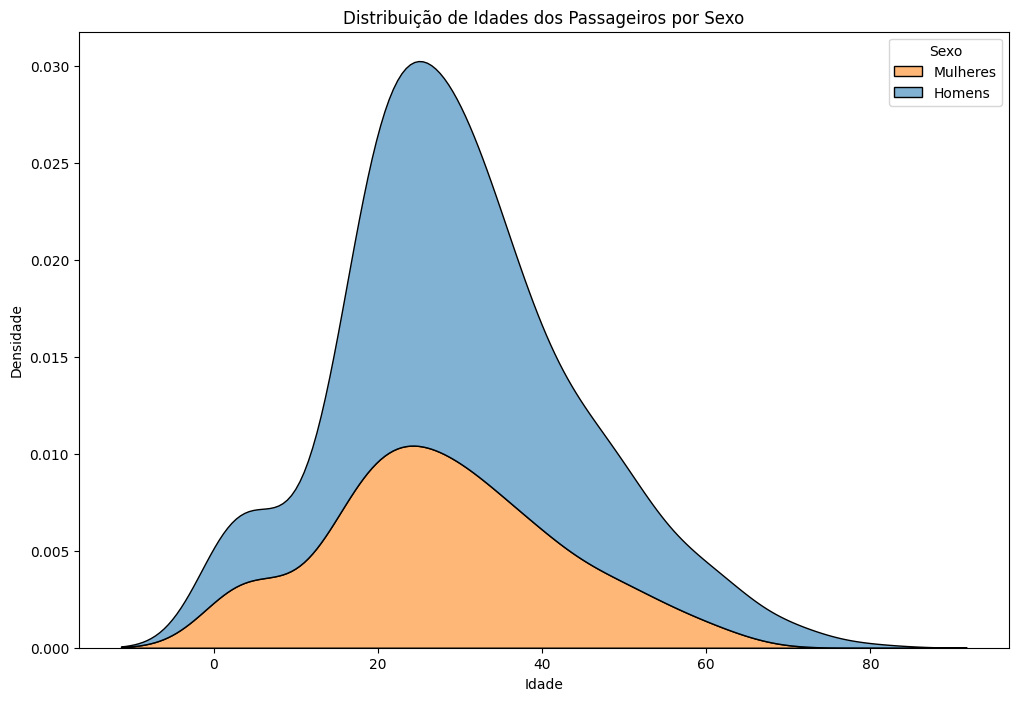

In [10]:
# Criando uma paleta de cores para os gráficos.
custom_palette = {"male": "#5799C6", "female": "#FF9F4B"}

# Criando o gráfico kdeplot
plt.figure(figsize=(12,8))
graph = sns.kdeplot(data=train_DF, x="Age", hue="Sex", multiple="stack", palette= custom_palette)

# Configurações do gráfico
plt.title('Distribuição de Idades dos Passageiros por Sexo')
plt.xlabel('Idade')
plt.ylabel('Densidade')
#plt.legend()
#plt.legend(title='Sexo', loc='upper right')
graph.legend(title='Sexo', labels=['Mulheres', 'Homens'], loc='upper right')
# Exibir o gráfico
plt.show()

Analisando agora apenas os sobreviventes

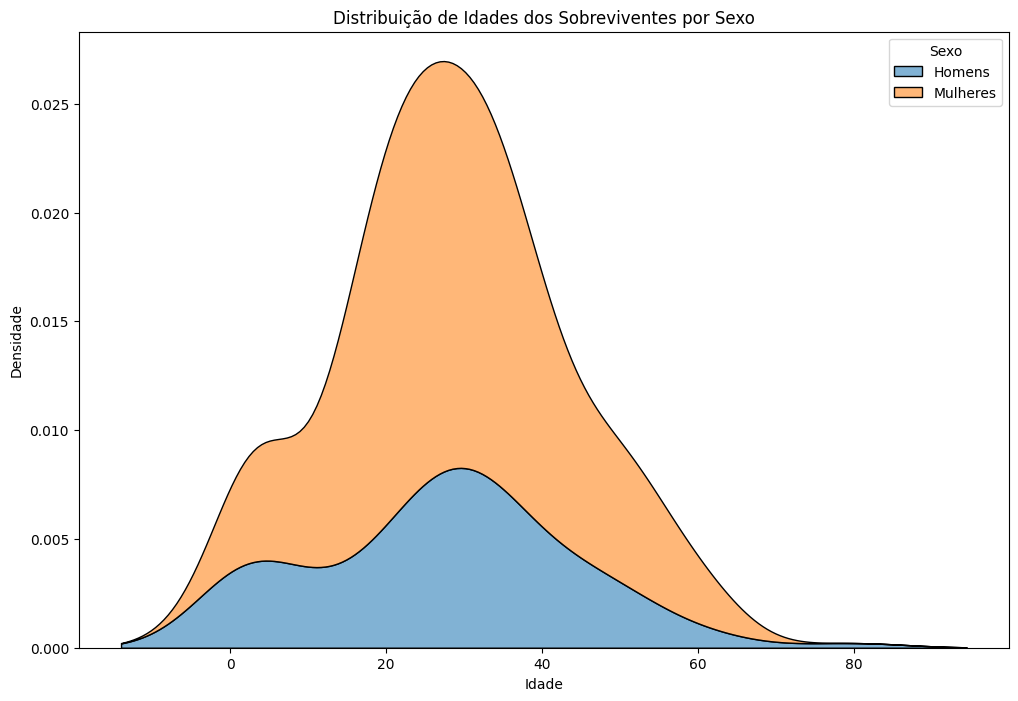

In [11]:
# Criando o gráfico kdeplot
survivors = train_DF.loc[train_DF["Survived"] == 1]
#custom_palette = {"male": "#5799C6", "female": "#FF9F4B"}

plt.figure(figsize=(12,8))
graph = sns.kdeplot(data=survivors, x="Age", hue="Sex", multiple="stack", palette= custom_palette)

# Configurações do gráfico
plt.title('Distribuição de Idades dos Sobreviventes por Sexo')
plt.xlabel('Idade')
plt.ylabel('Densidade')
graph.legend(title='Sexo', labels= ["Homens", "Mulheres"] , loc='upper right')
# Exibir o gráfico
plt.show()

Nota-se que sobreviveram muito mais mulheres em todas as faixas etárias do que homens.

• Observando agora, de modo mais geral, a comparação % de sobrevivencia entre os sexos para tentar identificar se há relação direta entre esses fatores:

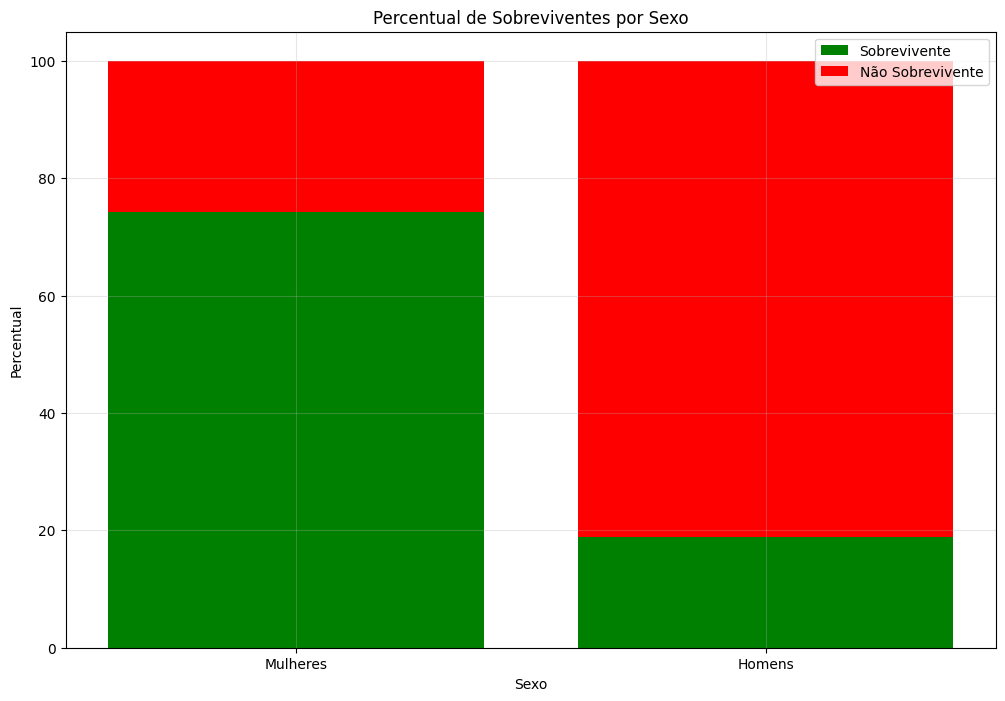

In [43]:
fig, ax = plt.subplots(figsize=(12, 8))
survival_percent = train_DF.groupby('Sex')['Survived'].value_counts(normalize=True).unstack() * 100

# Definindo as barras para homens e mulheres
bar_index = range(len(survival_percent))

# Plotagem das barras
bars1 = ax.bar(bar_index, survival_percent[1], label='Sobrevivente', color='green')
bars2 = ax.bar(bar_index, survival_percent[0], bottom=survival_percent[1], label='Não Sobrevivente', color='red')

# Configurando a transparência do grid
plt.grid(True, alpha=0.3)
# Adicionando detalhes ao gráfico
ax.set_xlabel('Sexo')
ax.set_ylabel('Percentual')
ax.set_title('Percentual de Sobreviventes por Sexo')
ax.set_xticks(bar_index)
ax.set_xticklabels(["Mulheres", 'Homens'])
ax.legend(loc='upper right')  # Movendo a legenda para o canto superior direito
plt.show()

Nota-se que sobreviveram muito mais mulheres do que homens neste evento, apesar da quantidade total de homens ser muito maior. Isso pode ser causado pela prioridade em evacuar o navio.

### Calculando os percentuais de sobreviventes e não sobreviventes por classe


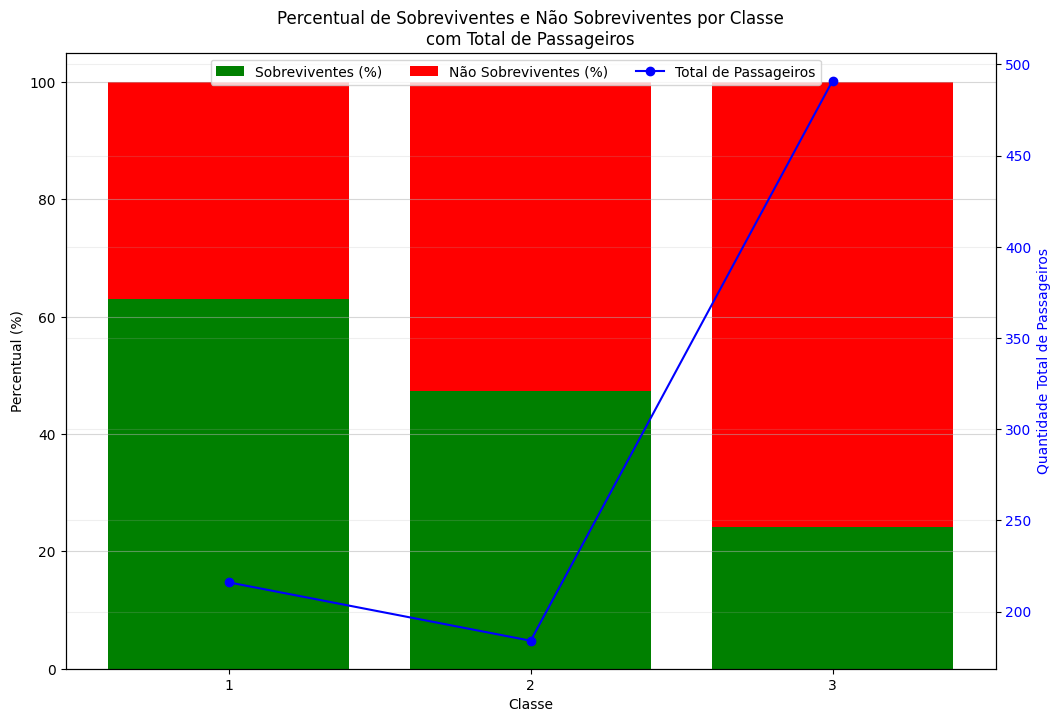

In [52]:
# Quantidade total de passageiros por classe
total_per_class = train_DF['Pclass'].value_counts().sort_index()

# Percentual de sobreviventes e não sobreviventes por classe
percent_survived_per_class = train_DF.groupby('Pclass')['Survived'].mean() * 100
percent_not_survived_per_class = 100 - percent_survived_per_class

# Criando o gráfico com dois eixos y
fig, ax1 = plt.subplots(figsize=(12, 8))

# Gráfico de barras empilhadas para os percentuais
bar1 = ax1.bar(total_per_class.index, percent_survived_per_class, color='green', label='Sobreviventes (%)')
bar2 = ax1.bar(total_per_class.index, percent_not_survived_per_class, bottom=percent_survived_per_class, color='red', label='Não Sobreviventes (%)')
ax1.set_xlabel('Classe')
ax1.set_ylabel('Percentual (%)')
ax1.set_title('Percentual de Sobreviventes e Não Sobreviventes por Classe\ncom Total de Passageiros')

# Configurando a transparência do grid
plt.grid(True, alpha=0.5, axis="y")

# Criando um segundo eixo y para a quantidade total de passageiros
ax2 = ax1.twinx()
line = ax2.plot(total_per_class.index, total_per_class, color='blue', marker='o', linestyle='-', label='Total de Passageiros')

# Mudando a cor do eixo da direita (ax2)
ax2.set_ylabel('Quantidade Total de Passageiros', color='blue')  # Cor azul
ax2.tick_params(axis='y', labelcolor='blue')  # Cor dos rótulos

# Combinar as legendas
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
combined_handles = handles1 + handles2
combined_labels = labels1 + labels2

# Definir os ticks do eixo x para serem apenas 1, 2 e 3
ax1.set_xticks([1, 2, 3])

# Configurando a transparência do grid
plt.grid(True, alpha=0.2)

# Posicionar a legenda dentro do gráfico, abaixo do título
fig.legend(combined_handles, combined_labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 0.88))

plt.show()


É possível notar que, a primeira classe teve uma taxa de mais de 60% de sobrevivência, e que é possível que tenham tido certa prioridade ao deixar o Titanic, seguida da classe 2 com pouco mais de 40% e por ultimo, a classe que mais passageiros não sobreviveram, a classe 3, com taxa de sobrevivência de pouco mais que 20%.

Além disso, de modo geral, sobreviveram mais mulheres em todas as faixas etárias.

### • Observando os percentuais de sobreviventes e a possível relação com a quantidade de irmãos/conjuge:

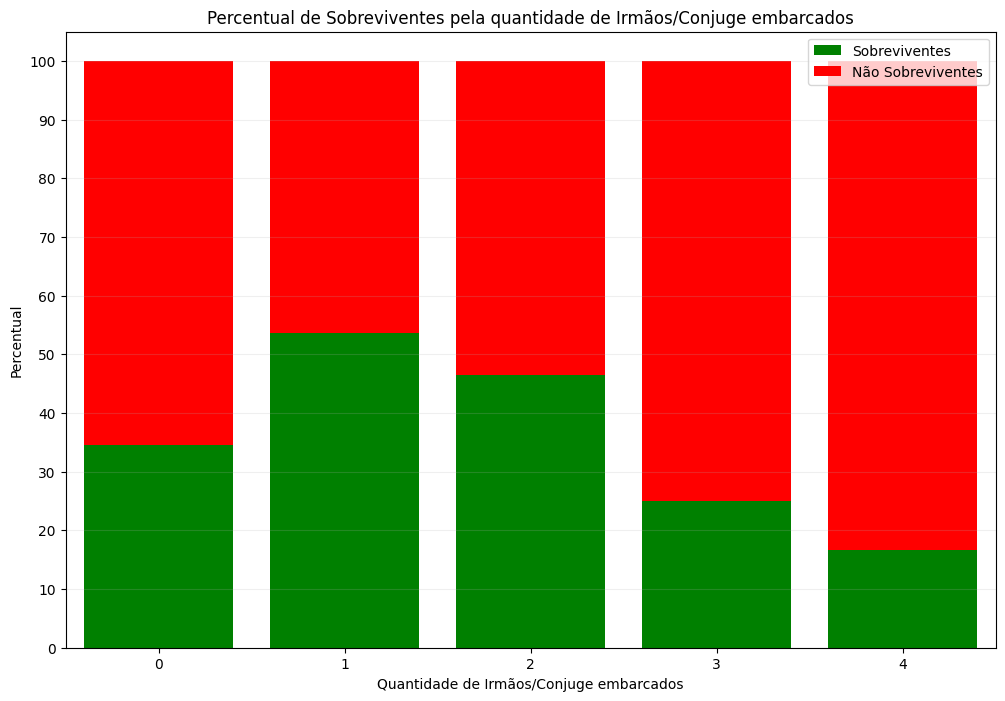

In [82]:
fig, ax = plt.subplots(figsize=(12, 8))
survival_percent = train_DF.groupby('SibSp')['Survived'].value_counts(normalize=True).unstack() * 100

plt.grid( axis= 'y', alpha= 0.3)
# Definindo as barras para cada parametro
bar_index = range(len(survival_percent),)

# Plotagem das barras
bars1 = ax.bar(bar_index, survival_percent[1], label='Sobreviventes', color='green')
bars2 = ax.bar(bar_index, survival_percent[0], bottom=survival_percent[1], label='Não Sobreviventes', color='red')

# Adicionando detalhes ao gráfico
ax.set_xlabel('Quantidade de Irmãos/Conjuge embarcados')
ax.set_ylabel('Percentual')
ax.set_title('Percentual de Sobreviventes pela quantidade de Irmãos/Conjuge embarcados')
ax.set_xticks(bar_index)

# Definir os ticks do eixo x para serem apenas 1, 2 e 3
ax1.set_xticks([1, 2, 3])

# Configurando a transparência do grid
plt.grid(True, axis= 'y', alpha=0.2)

#ax.set_xticklabels(["Mulheres", 'Homens'])
ax.legend(loc='upper right')  # Movendo a legenda para o canto superior direito
#plt.xticks(np.arange(0,5,1))
ax.set_yticks(np.arange(0, 110, 10))
ax.set_xlim(-0.5, 4.5)
plt.show()

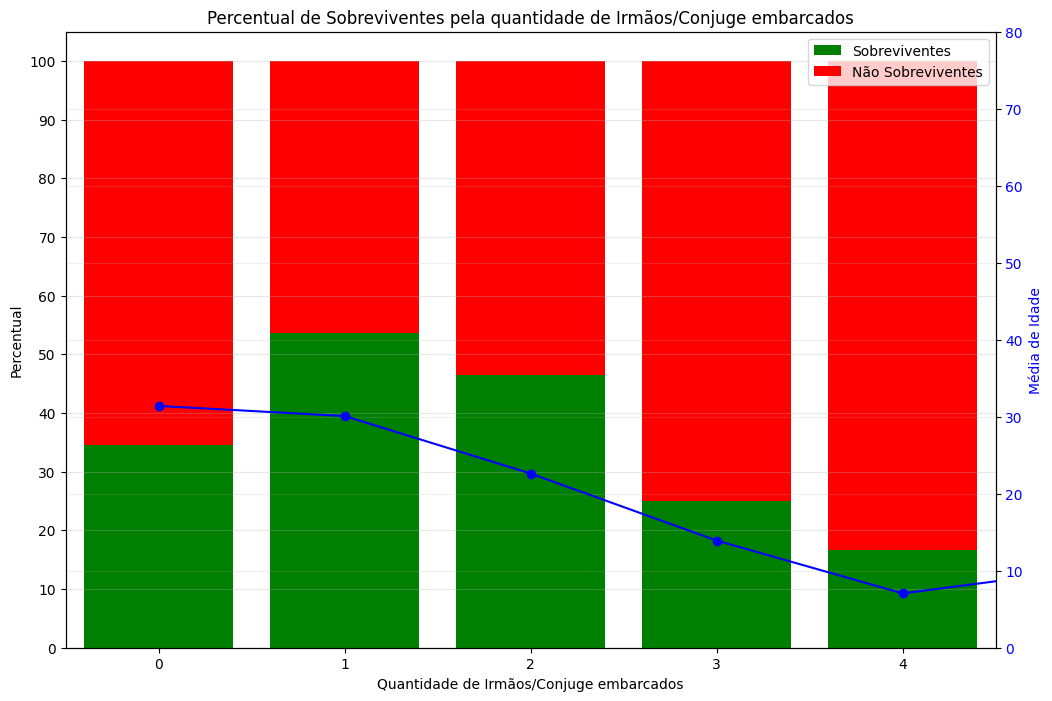

In [80]:
# Média de idade por SibSp (cálculo correto)
mean_age_per_Sib = train_DF.groupby('SibSp')['Age'].mean()

fig, ax = plt.subplots(figsize=(12, 8))
survival_percent = train_DF.groupby('SibSp')['Survived'].value_counts(normalize=True).unstack() * 100

plt.grid( axis= 'y', alpha= 0.3)
# Definindo as barras para cada parametro
bar_index = range(len(survival_percent),)

# Plotagem das barras
bars1 = ax.bar(bar_index, survival_percent[1], label='Sobreviventes', color='green')
bars2 = ax.bar(bar_index, survival_percent[0], bottom=survival_percent[1], label='Não Sobreviventes', color='red')

# Adicionando detalhes ao gráfico
ax.set_xlabel('Quantidade de Irmãos/Conjuge embarcados')
ax.set_ylabel('Percentual')
ax.set_title('Percentual de Sobreviventes pela quantidade de Irmãos/Conjuge embarcados')
ax.set_xticks(bar_index)

# Criando um segundo eixo y para a quantidade total de passageiros
ax2 = ax.twinx()
line = ax2.plot(mean_age_per_Sib.index, mean_age_per_Sib, color='blue', marker='o', linestyle='-', label='Média de Idade')

# Mudando a cor do eixo da direita (ax2)
ax2.set_ylabel('Média de Idade', color='blue')  
ax2.tick_params(axis='y', labelcolor='blue')  
ax2.set_ylim(0, 80)  # Definir o range de 0 a 80 anos no eixo secundário

# Combinar as legendas
handles1, labels1 = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
combined_handles = handles1 + handles2
combined_labels = labels1 + labels2

# Definir os ticks do eixo x para serem apenas 1, 2 e 3
ax1.set_xticks([1, 2, 3])

# Configurando a transparência do grid
plt.grid(True, alpha=0.2)

#ax.set_xticklabels(["Mulheres", 'Homens'])
ax.legend(loc='upper right')  # Movendo a legenda para o canto superior direito
#plt.xticks(np.arange(0,5,1))
ax.set_yticks(np.arange(0, 110, 10))
ax.set_xlim(-0.5, 4.5)
plt.show()

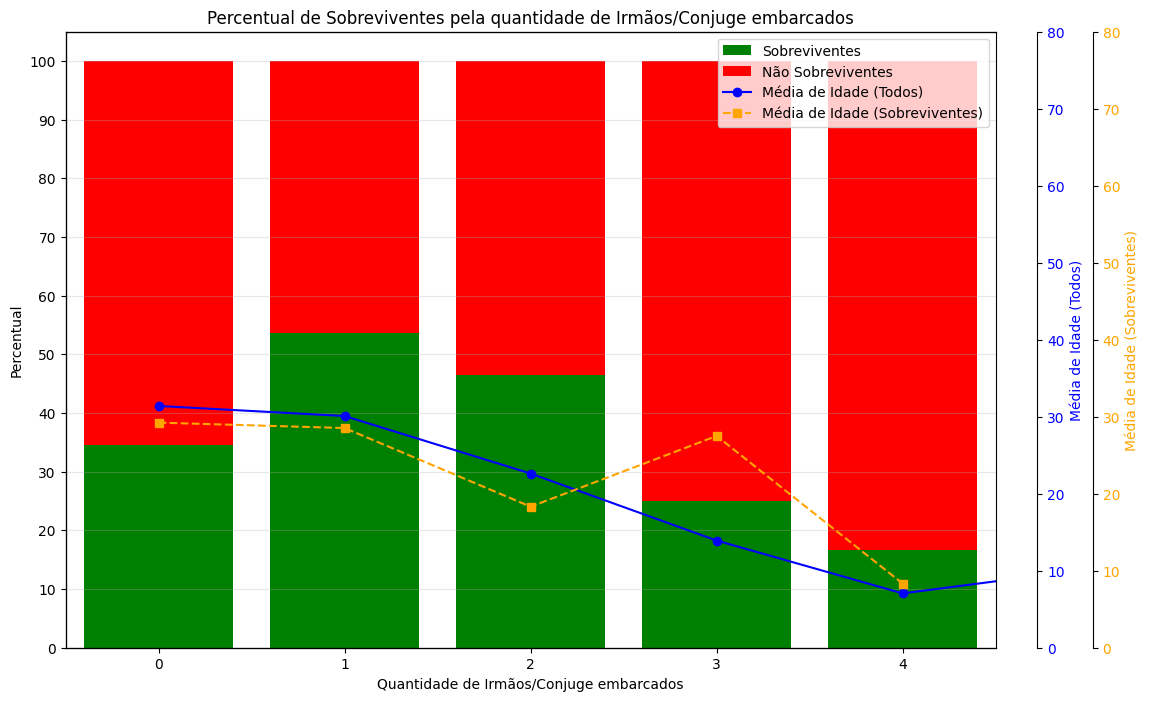

In [79]:
# Média de idade por SibSp (cálculo correto)
mean_age_per_Sib = train_DF.groupby('SibSp')['Age'].mean()
mean_age_survivors = train_DF[train_DF['Survived'] == 1].groupby('SibSp')['Age'].mean()

fig, ax = plt.subplots(figsize=(12, 8))
survival_percent = train_DF.groupby('SibSp')['Survived'].value_counts(normalize=True).unstack() * 100

plt.grid(axis='y', alpha=0.3)

# Definindo as barras para cada parâmetro
bar_index = range(len(survival_percent))

# Plotagem das barras
bars1 = ax.bar(bar_index, survival_percent[1], label='Sobreviventes', color='green')
bars2 = ax.bar(bar_index, survival_percent[0], bottom=survival_percent[1], label='Não Sobreviventes', color='red')

# Adicionando detalhes ao gráfico
ax.set_xlabel('Quantidade de Irmãos/Conjuge embarcados')
ax.set_ylabel('Percentual')
ax.set_title('Percentual de Sobreviventes pela quantidade de Irmãos/Conjuge embarcados')
ax.set_xticks(bar_index)

# Criando o segundo eixo y para a média de idade (todos os passageiros)
ax2 = ax.twinx()
line1 = ax2.plot(mean_age_per_Sib.index, mean_age_per_Sib, color='blue', marker='o', linestyle='-', label='Média de Idade (Todos)')

# **Deslocar o segundo eixo um pouco para a direita**
ax2.spines["right"].set_position(("outward", 30))  # Move ligeiramente para a direita

# Mudando a cor do eixo da direita (ax2)
ax2.set_ylabel('Média de Idade (Todos)', color='blue')  
ax2.tick_params(axis='y', labelcolor='blue')  
ax2.set_ylim(0, 80)  # Definir o range de 0 a 80 anos no eixo secundário

# Criando o terceiro eixo y para a média de idade apenas dos sobreviventes
ax3 = ax.twinx()
line2 = ax3.plot(mean_age_survivors.index, mean_age_survivors, color='orange', marker='s', linestyle='--', label='Média de Idade (Sobreviventes)')

# **Deslocar o terceiro eixo ainda mais para a direita**
ax3.spines["right"].set_position(("outward", 70))  # Move ainda mais para evitar sobreposição

# Mudando a cor do eixo da direita (ax3)
ax3.set_ylabel('Média de Idade (Sobreviventes)', color='orange')  
ax3.tick_params(axis='y', labelcolor='orange')  
ax3.set_ylim(0, 80)  # Mesmo range de idade para consistência

# **Definir os ticks corretamente para os três eixos separadamente**
ax.set_yticks(np.arange(0, 110, 10))  # Eixo principal (percentual de sobrevivência)
ax2.set_yticks(np.arange(0, 90, 10))  # Eixo secundário (média de idade geral)
ax3.set_yticks(np.arange(0, 90, 10))  # Eixo terciário (média de idade dos sobreviventes)

# Combinar as legendas
handles1, labels1 = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles3, labels3 = ax3.get_legend_handles_labels()
ax.legend(handles1 + handles2 + handles3, labels1 + labels2 + labels3, loc='upper right')
ax.set_xlim(-0.5, 4.5)
plt.show()


É possível notar que ter um ou dois Irmãos/Conjuje embarcados aumentou a taxa de sobrevivência dos passageiros, isso talvez seja explicado pela possível união desses passageiros com seus irmãos/conjuge, a fim de se salvarem, assim, puderam ter uma taxa de sobrevivência maior.

#### • Verificando a presença de outliers referente a variável SibSp:

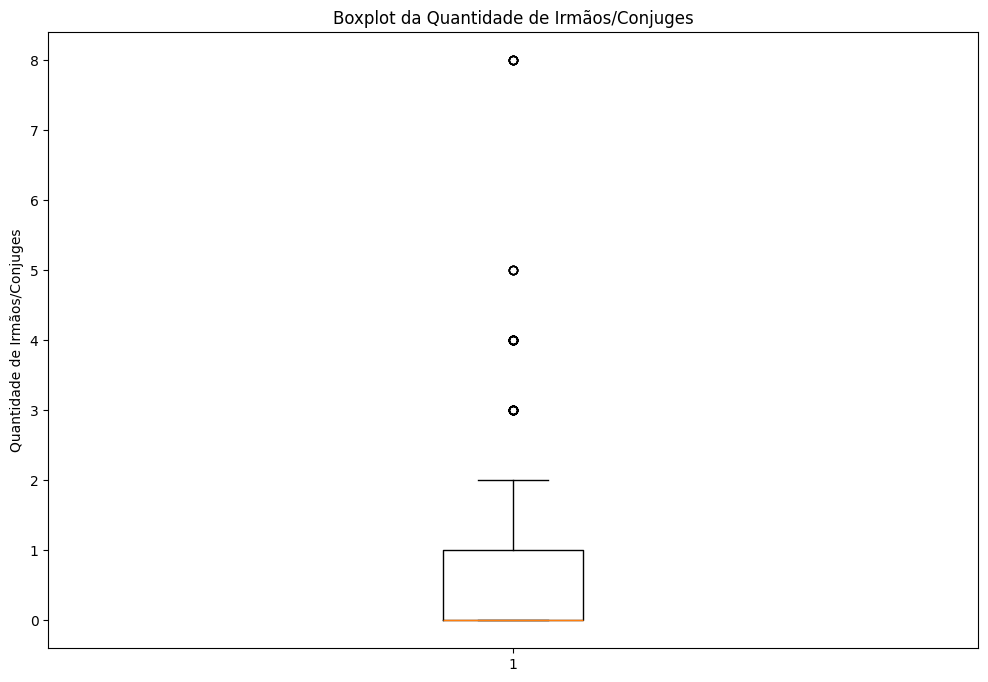

In [16]:


# Criando gráfico BoxPlot para verificar a presença de outliers:
plt.figure(figsize=(12, 8))
plt.boxplot(age_DF["SibSp"])#.dropna())
#sns.boxplot(x='Pclass', y='Age', data=age_DF)  
plt.title('Boxplot da Quantidade de Irmãos/Conjuges')
plt.ylabel('Quantidade de Irmãos/Conjuges')
plt.show()


Nota-se que há possíveis outliers em relação ao parâmetro de irmãos/conjuges, assim, na próxima etapa, pré-processamento, esse parâmetro deverá ser corrigido, caso julgue necessário.

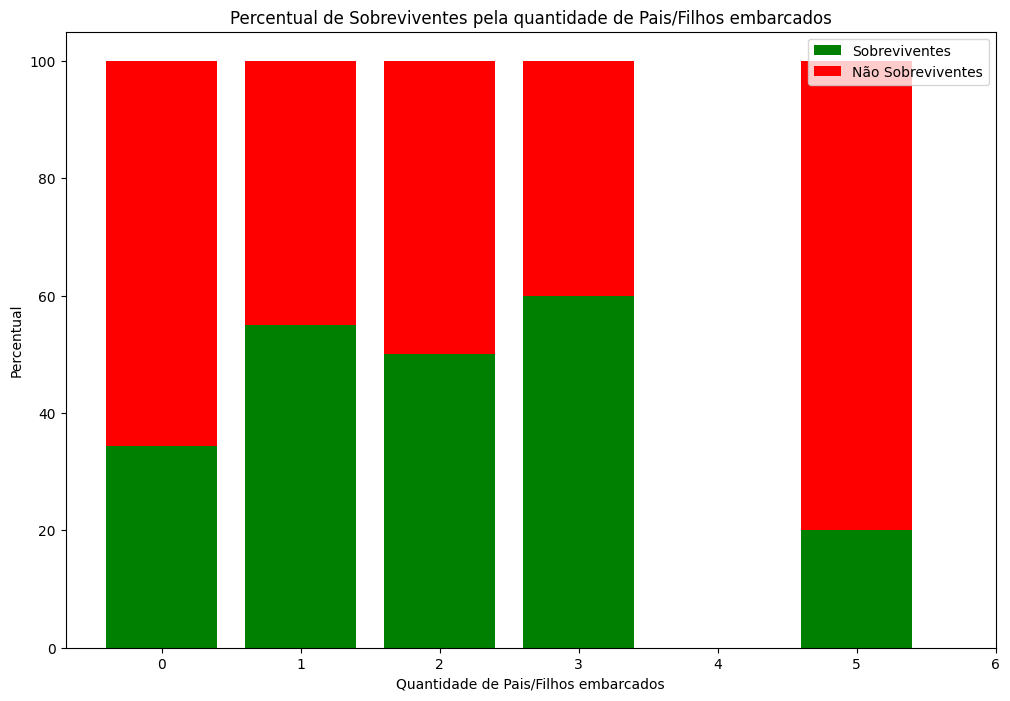

In [17]:
fig, ax = plt.subplots(figsize=(12, 8))
survival_percent = train_DF.groupby('Parch')['Survived'].value_counts(normalize=True).unstack() * 100

# Definindo as barras para cada parametro
bar_index = range(len(survival_percent),)

# Plotagem das barras
bars1 = ax.bar(bar_index, survival_percent[1], label='Sobreviventes', color='green')
bars2 = ax.bar(bar_index, survival_percent[0], bottom=survival_percent[1], label='Não Sobreviventes', color='red')

# Adicionando detalhes ao gráfico
ax.set_xlabel('Quantidade de Pais/Filhos embarcados')
ax.set_ylabel('Percentual')
ax.set_title('Percentual de Sobreviventes pela quantidade de Pais/Filhos embarcados')
ax.set_xticks(bar_index)
#ax.set_xticklabels(["Mulheres", 'Homens'])
ax.legend(loc='upper right')  # Movendo a legenda para o canto superior direito
plt.show()

Os passageiros que não tinham Pais/Filhos embarcados tiveram uma taxa consideravelmente menor de sobrevivência se comparados aos passageiros com 1 até 3 nesse parâmetro. Já com 4 ou mais pais/filhos embarcados, a taxa retornou a cair ou não há quantidade de dados suficientes para se ter uma boa métrica.

### • Obervando o percentual de local de embarque de cada classe:

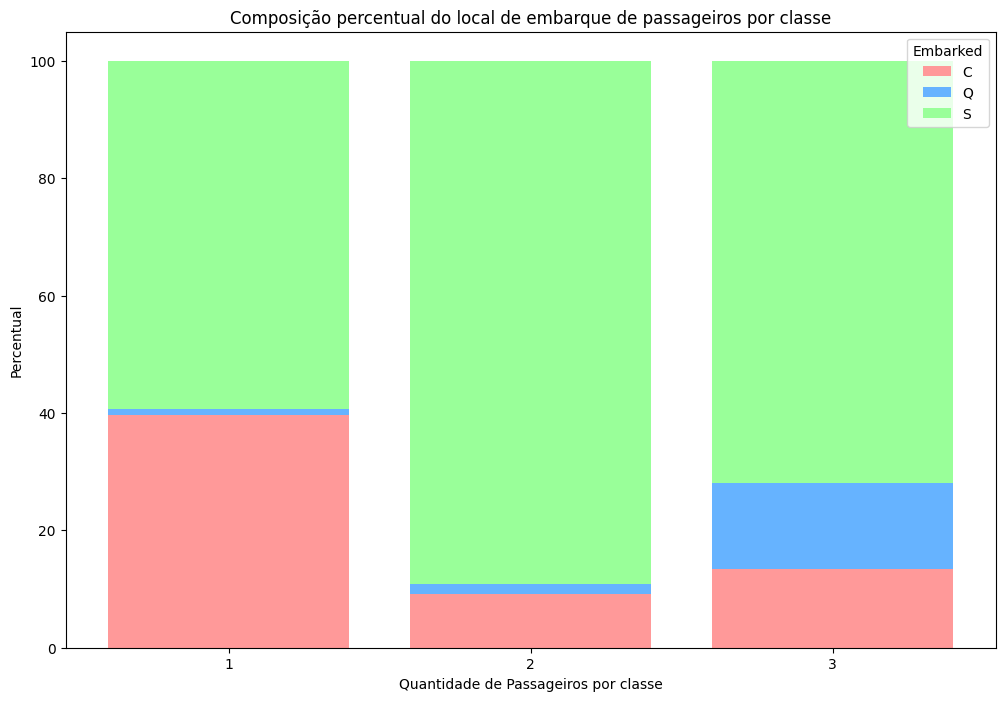

In [92]:
fig, ax = plt.subplots(figsize=(12, 8))
embarked_percent = train_DF.groupby('Pclass')['Embarked'].value_counts(normalize=True).unstack() * 100

# Ordenar o DataFrame pelas classes (opcional, se já estiver ordenado)
embarked_percent = embarked_percent.sort_index()

# Definindo as barras para cada parametro
bar_index = range(len(embarked_percent))

# Plotagem das barras
colors = ['#ff9999', '#66b3ff', '#99ff99']

# Plotagem das barras empilhadas
bottom = None
for i, embarked in enumerate(embarked_percent.columns):
    if bottom is None:
        bars = ax.bar(embarked_percent.index, embarked_percent[embarked], color=colors[i], label=embarked)
        bottom = embarked_percent[embarked]
    else:
        bars = ax.bar(embarked_percent.index, embarked_percent[embarked], bottom=bottom, color=colors[i], label=embarked)
        bottom += embarked_percent[embarked]
    
# Adicionando detalhes ao gráfico
ax.set_xlabel('Quantidade de Passageiros por classe')
ax.set_ylabel('Percentual')
ax.set_title('Composição percentual do local de embarque de passageiros por classe')
ax.set_xticks(embarked_percent.index)
plt.legend(title= "Embarked")
plt.show()

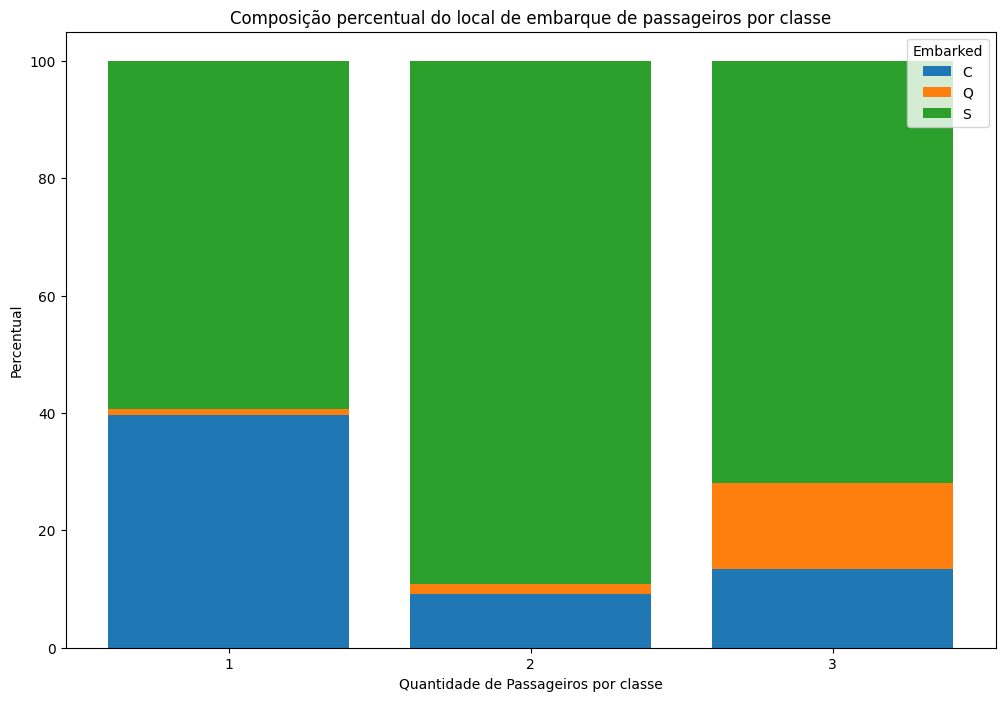

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(12, 8))

embarked_percent = train_DF.groupby('Pclass')['Embarked'].value_counts(normalize=True).unstack() * 100

# Ordenar o DataFrame pelas classes (opcional, se já estiver ordenado)
embarked_percent = embarked_percent.sort_index()

# Definindo as barras para cada parâmetro
bar_index = range(len(embarked_percent))

# Usando o pallete 'tab10' para as cores
colors = plt.cm.tab10.colors[:len(embarked_percent.columns)]  # Pega as cores do tab10

# Plotagem das barras empilhadas
bottom = None
for i, embarked in enumerate(embarked_percent.columns):
    if bottom is None:
        bars = ax.bar(embarked_percent.index, embarked_percent[embarked], color=colors[i], label=embarked)
        bottom = embarked_percent[embarked]
    else:
        bars = ax.bar(embarked_percent.index, embarked_percent[embarked], bottom=bottom, color=colors[i], label=embarked)
        bottom += embarked_percent[embarked]

# Adicionando detalhes ao gráfico
ax.set_xlabel('Quantidade de Passageiros por classe')
ax.set_ylabel('Percentual')
ax.set_title('Composição percentual do local de embarque de passageiros por classe')
ax.set_xticks(embarked_percent.index)
plt.legend(title="Embarked")
plt.show()


A grande maioria das pessoas embarcou no porto S, de todas as três classes, mas principalmente da segunda. 
Pouco menos da metade dos passageiros da primeira classe embarcaram no porto C, e a grande maioria dos passageiros que embarcaram no porto Q eram da terceira classe.

• Analisando a distribuição dos preços das passagens por classe:

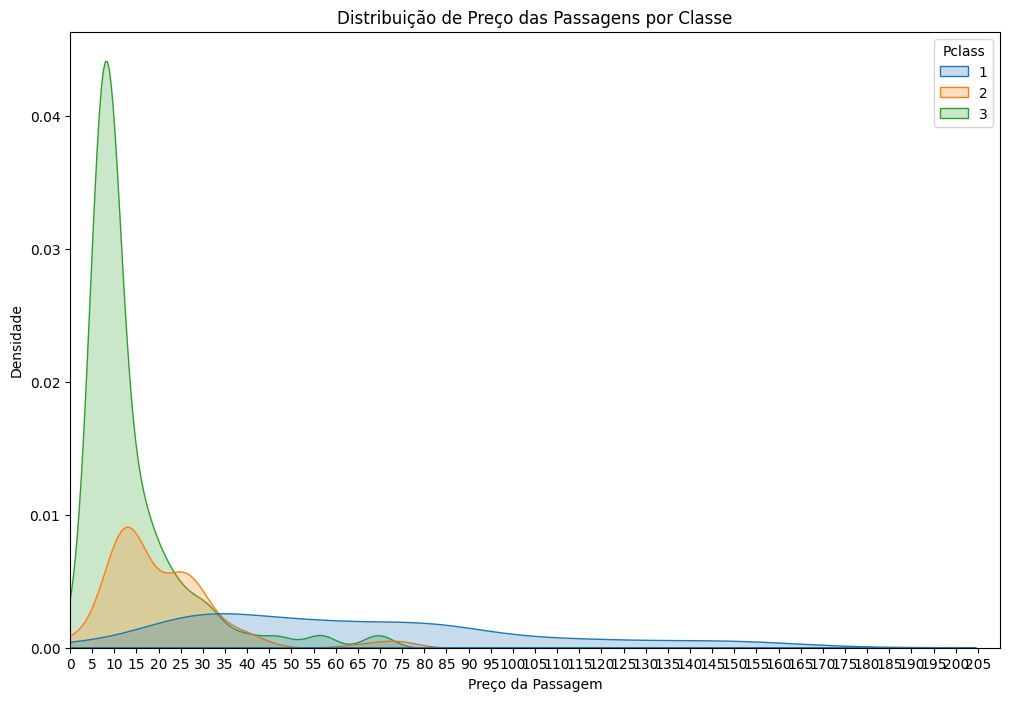

In [101]:
# Criando o gráfico kdeplot
fare_df = train_DF.loc[train_DF["Fare"] <= 200]

fare_df = fare_df.sort_values(by='Pclass')
plt.figure(figsize=(12,8))
ax = sns.kdeplot(data=fare_df, x="Fare", hue="Pclass",fill=True, palette= "tab10")#,bw=0.1)#custom_palette)

# Configurações do gráfico
plt.title('Distribuição de Preço das Passagens por Classe')
plt.xlabel('Preço da Passagem')
plt.ylabel('Densidade')
#graph.legend(title='Classe',labels= ["1", "2","3"] ,  loc='upper right')
# Exibir o gráfico
ax.set_xlim(0, 210)
ax.set_xticks(np.arange(0, 210, 5))

plt.show()

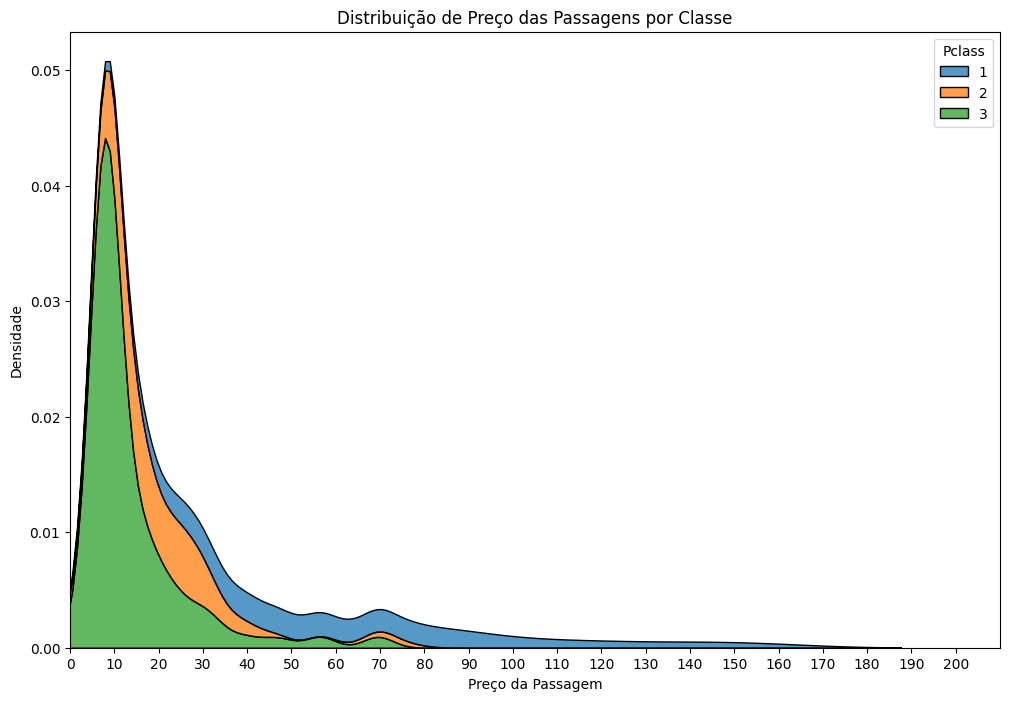

In [102]:
# Criando o gráfico kdeplot
fare_df = train_DF.loc[train_DF["Fare"] <= 200]
fare_df = fare_df.sort_values(by='Pclass')
plt.figure(figsize=(12,8))
ax = sns.kdeplot(data=fare_df, x="Fare", hue="Pclass",multiple="stack", palette= "tab10")

# Configurações do gráfico
plt.title('Distribuição de Preço das Passagens por Classe')
plt.xlabel('Preço da Passagem')
plt.ylabel('Densidade')
#graph.legend(title='Classe',labels= ["1", "2","3"] ,  loc='upper right')
# Exibir o gráfico
ax.set_xlim(0, 210)
ax.set_xticks(np.arange(0, 210, 10))
plt.show()

A grande maioria dos passageiros pagou quase $10 pela passagem, e eram da terceira classe. A classe que pagou mais caro em suas passagens era da primeira classe.


### • Observando se há relação entre cabines vazias e classe social:

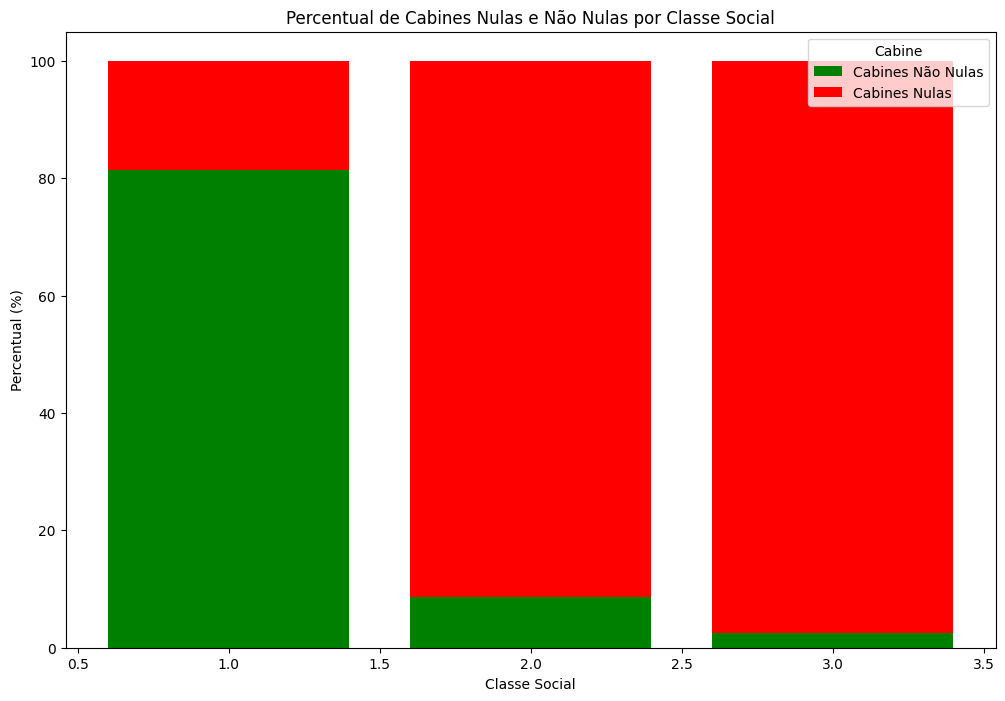

In [20]:
# twinax fazer plot da linha de volume
# Criando a nova coluna indicando se a cabine é nula ou não
train_DF['CabinStatus'] = train_DF['Cabin'].notnull()

# Calculando o percentual de cabines nulas e não nulas por classe social
cabin_percent = train_DF.groupby('Pclass')['CabinStatus'].value_counts(normalize=True).unstack() * 100

# Criando o gráfico de barras empilhadas
fig, ax = plt.subplots(figsize=(12, 8))

# Plotando as pilhas individualmente para garantir a ordem correta
cabin_non_null = cabin_percent[True]  # Cabines Não Nulas
cabin_null = cabin_percent[False]     # Cabines Nulas

ax.bar(cabin_percent.index, cabin_non_null, color='green', label='Cabines Não Nulas')
ax.bar(cabin_percent.index, cabin_null, bottom=cabin_non_null, color='red', label='Cabines Nulas')

# Configurações do gráfico
plt.title('Percentual de Cabines Nulas e Não Nulas por Classe Social')
plt.xlabel('Classe Social')
plt.ylabel('Percentual (%)')
plt.legend(title='Cabine', loc='upper right')
plt.show()

A Grande maioria dos tickets que tinham cabines definidas eram da 1ª classe, enquanto a grande maioria da segunda e terceira classe não tinham especificação de cabines.

• Realizando a mesma verificação em relação a idade definida ou não dos passageiros e a classe social

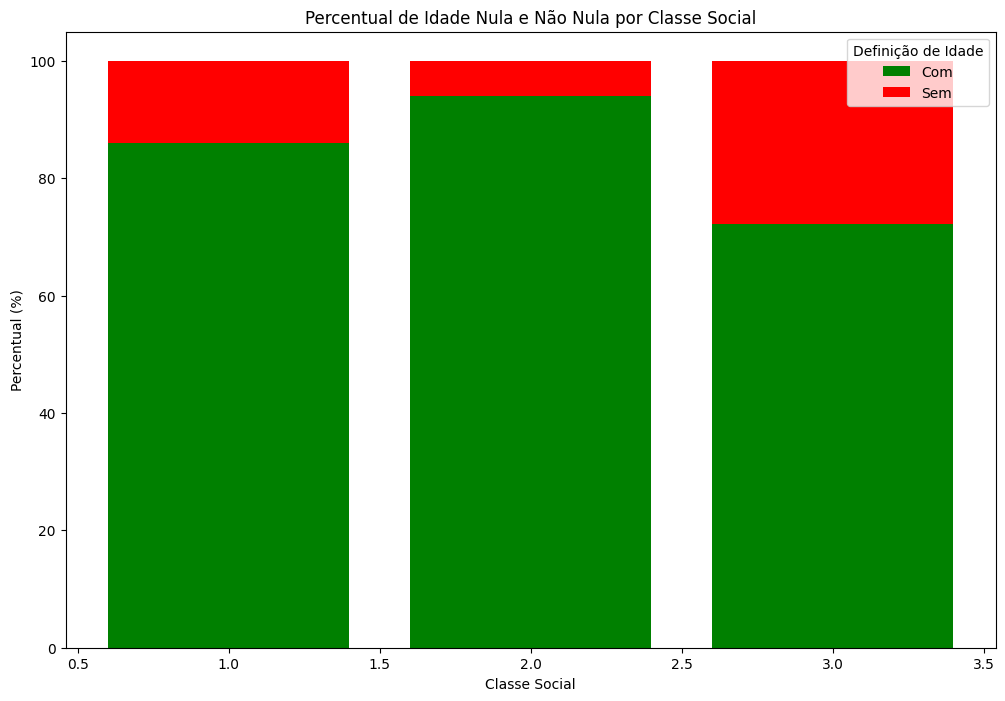

In [21]:
# Criando a nova coluna indicando se a idade é nula ou não
train_DF['AgeStatus'] = train_DF['Age'].notnull()
fig, ax = plt.subplots(figsize=(12, 8))

# Calculando o percentual de cabines nulas e não nulas por classe social
Age_percent = train_DF.groupby('Pclass')['AgeStatus'].value_counts(normalize=True).unstack() * 100
# Reordenando as colunas para que 'True' (idade definida) venha antes de 'False' (idade indefinida)

# Plotando as pilhas individualmente para garantir a ordem correta
age_defined = Age_percent[True]
age_undefined = Age_percent[False]

ax.bar(Age_percent.index, age_defined, color='green', label='Com')
ax.bar(Age_percent.index, age_undefined, bottom=age_defined, color='red', label='Sem')
# Configurações do gráfico
plt.title('Percentual de Idade Nula e Não Nula por Classe Social')
plt.xlabel('Classe Social')
plt.ylabel('Percentual (%)')
plt.legend(title='Definição de Idade', loc="upper right")
plt.show()

A classe com maior percentual de passageiros sem idade definida é a terceira, seguida da primeira e segunda classe. Porém, pela quantidade de pessoas em cada uma das classes, há muito mais passageiros sem idade definida na classe 2 e 3.

Verificando os dtypes dos dados para saber quais parâmetros devem ser corrigidos:

In [22]:
train_DF.dtypes

Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin           object
Embarked        object
CabinStatus       bool
AgeStatus         bool
dtype: object

- A coluna 'Pclass' apesar de usar números, não deve ser atribuído este tipo, pois é uma variável categórica, uma correção deverá ser realizada;
- A coluna survived cairia nesse mesmo parâmetro, porém como é a coluna target, deve ser desconsiderada;


In [23]:
#proximos passos: feature engineer, o valor da taxa / media da taxa da classe (pós train split), taxa * SibSp
# pre processamento - tratamento de nulos, encoders, novas variaveis,
# entrada da base original -> pre processamento -> base de saida preparada para modelagem

# modificações do EDA que devem ser realizadas: 
# colocar graficos reflativizados (%), trazer graficos KDE, aprender sobre, escrever mais sobre o porque de cada coisa. 
# Preenchimento de missing values deve ser movido para o notebook de pre processing 

## Conclusão

